In [ ]:
!pip install facenet-pytorch --quiet
!pip install --upgrade pillow==6.2.2 

In [1]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
import timeit
import pstats

In [2]:
class Classifier_Compare:
    def __init__(self):
        self.HAARCASCADES = {
            'Timing': 0.0,
        }

        self.MTCNN = {
            'Timing': 0.0,
        }
        
        # Load facedetector
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.mtcnn = MTCNN(keep_all=True, device=device)
        self.haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        # Load image using openCV (BGR)
        import urllib.request
        url = 'https://raw.githubusercontent.com/na-nora/face-detection/main/nichtEr.png'
        image_path = 'nichtEr.png'
        urllib.request.urlretrieve(url, image_path)
        self.frame = cv2.imread(image_path)
        self.frame = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
    
    def compute_HAARCASCADE(self, rounds ): 
        print("Compute Haarcascades")
        mean_ticktime = 0.0
        i = 0
        
        while i < rounds:
            # Detect Gesichter mit Haarcascade-Classifier
            start = cv2.getTickCount()
            faces_haarcascade = self.haarcascade.detectMultiScale(self.frame)
            stop = cv2.getTickCount()
            mean_ticktime += (stop - start)/ cv2.getTickFrequency()
            i=i+1
        self.HAARCASCADES['Timing'] = mean_ticktime / rounds 
        return faces_haarcascade

    def compute_MTCNN(self, rounds):
        print("Compute MTCNN")
        i = 0
        mean_ticktime = 0.0

        while i < rounds:
            # Detect Gesichter mit MTCNN-Classifier
            start = cv2.getTickCount()
            faces_mtcnn = self.mtcnn.detect(self.frame)
            stop = cv2.getTickCount()
            mean_ticktime +=  (stop - start)/ cv2.getTickFrequency()
            i=i+1
        self.MTCNN['Timing'] = mean_ticktime / rounds 
        return faces_mtcnn

    def generate_image(self, faces_haarcascade, faces_mtcnn):
        print("Generate final image")
        # Zeichne die Ergebnisse auf dem Bild
        for (x, y, w, h) in faces_haarcascade:
            cv2.rectangle(self.frame, (x,y),(x+w,y+h),(255, 0, 0),8)

        for (x, y, w, h) in faces_mtcnn[0]:
            cv2.rectangle(self.frame, (int(x),int(y)),(int(x)+int(w),int(y)+int(h)),(0, 255, 0),8)

        # Plot the image
        plt.figure(figsize=(8,6))
        plt.imshow(self.frame)
        plt.axis('off')
        plt.title("Face detection with HCC (red) and MTCNN (green)")
        plt.show()

    def print_results(self):
        print("HAARCASSCADE:")
        for key, value in self.HAARCASCADES.items():
            print(f"{key}: {value} s")

        print("\nMTCNN:")
        for key, value in self.MTCNN.items():
            print(f"{key}: {value} s")

Compute Haarcascades
Compute MTCNN
Generate final image


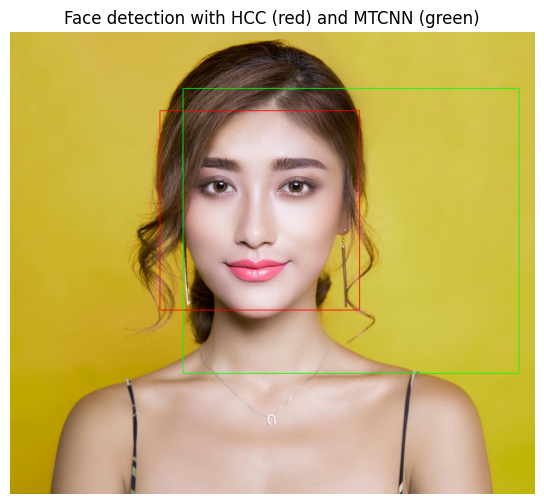

HAARCASSCADE:
Timing: 0.57768158485 s

MTCNN:
Timing: 0.7141102808900003 s


In [3]:
cf_compare = Classifier_Compare()
faces_haarcascade = cf_compare.compute_HAARCASCADE(100)
faces_mtcnn = cf_compare.compute_MTCNN(100)
cf_compare.generate_image( faces_haarcascade, faces_mtcnn )
cf_compare.print_results()